<h2>Table_of_Contents</h2>

- [R data structure with I/O](#R_data_structure_with_I/O)
    - [Data structure](#Data_structure)
        - [Scalar](#Scalar)
        - [Vector](#Vector)
        - [Matrix](#Matrix)
        - [Array](#Array)
        - [Data frame](#Data_frame)
        - [List](#List)
    - [Load the data](#Load_the_data)
        - [Load the txt file](#Load_the_txt_file)
        - [Load the csv file](#Load_the_csv_file)
        - [Load the excel file](#Load_the_excel_file)
        - [View the data structure](#View_the_data_structure)
    - [Factor and label](#Factor_and_label)
    - [Export the data](#Export_the_data)
        - [Export the txt file](#Export_the_txt_file)
        - [Export the csv file](#Export_the_csv_file)
        - [Export the excel file](#Export_the_excel_file)
        - [Export the data as R](#Export_the_data_as_R)
    - [Manipulate the data](#Manipulate_the_data)
- [References](#References)

<h3>R_data_structure_with_I/O</h3>

<h4>Data_structure</h4>

<center><img src="img/r_Data_structure.png" ></center> 

<li>Save only with the same data type: scalar, vector, matrix, array</li>
<li>Different types of data types can be stored: data frames, lists</li>

<h5>Scalar</h5>

In [4]:
# Scalar
c(1)

[1] 1

[Back to the top](#Table_of_Contents)

<h5>Vector</h5>

In [9]:
# Vector (c) - Numeric data type
num <- c(1,2,3,4) # c(1:4)
num
# View(num) # only working in RStudio

[1] 1 2 3 4

In [10]:
num.T <- t(num) # Transpose column vector to row vector
num.T
# View(numT) # only working in RStudio

1,2,3,4


In [12]:
num %*% num.T # Vector multiplication (4*1 X 1*4) = 4*4

1,2,3,4
2,4,6,8
3,6,9,12
4,8,12,16


In [13]:
num.T %*% num # Vector multiplication (1*4 X 4*1) = 1*1

30


In [14]:
# character, logical data type
c("M","F","F","M")
c(TRUE, FALSE, FALSE, TRUE)

[1] "M" "F" "F" "M"

[1]  TRUE FALSE FALSE  TRUE

[Back to the top](#Table_of_Contents)

<h5>Matrix</h5>

In [18]:
m <- 1:12
print(m)

# Matrix (Matrix 4x3)
mtx <- matrix(m, nrow=4)
print(mtx)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


In [19]:
mtx[3,2]

[1] 7

In [1]:
mat.ex = matrix(c(1,2,3,4,5,6), nrow = 2)
dim(mat.ex)
mat.ex

[1] 2 3

1,3,5
2,4,6


It is easy to construct diagonal matrices and extract diagonals from matrices in R. The same command is use.

In [6]:
a = matrix(1:9, nrow = 3)
diag(a)

diag(c(1,2,3))

# you can even change the diagonal of the matrix
# Here I'll change it to 1s
a
diag(a) = 1
a

[1] 1 5 9

1,0,0
0,2,0
0,0,3


1,4,7
2,5,8
3,6,9


1,4,7
2,1,8
3,6,1


Basic math with matrices

Matrix math is a bit cumbersome! Three key strokes for the multiplication symbol…oh well.

In [1]:
a = matrix(c(1, 2, 3, 2, 1, 2, 2, 2, 1), nrow = 3)
a
# transpose
t(a)
# multiplication
a%*%a
# inverse 
solve(a)

1,2,2
2,1,2
3,2,1


1,2,3
2,1,2
2,2,1


11,8,8
10,9,8
10,10,11


-0.4285714,0.2857143,0.2857143
0.5714286,-0.7142857,0.2857143
0.1428571,0.5714286,-0.4285714


Extracting parts of a matrix is similar to other programs.

In [2]:
a = matrix(c(1:9), nrow = 3)
a
# First row
a[1,]
# First column
a[,1]
# Second and third entry of the third row
a[3, 2:3]

1,4,7
2,5,8
3,6,9


[1] 1 4 7

[1] 1 2 3

[1] 6 9

[Back to the top](#Table_of_Contents)

<h5>Array</h5>

In [17]:
# Array (Array 2x3x2)
arr <- array(m, c(2,3,2))
print(arr)

, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12



In [2]:
array.ex = array(c(1:24), c(4, 3, 2))
dim(array.ex)
array.ex

[1] 4 3 2

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24

[Back to the top](#Table_of_Contents)

<h5>Data_frame</h5>

In [20]:
# Data Frame
var1 <- c(1,2,3,4)
var2 <- factor(c("M","F","F","M"))
df = data.frame(id = var1, sex = var2)
str(df)

'data.frame':	4 obs. of  2 variables:
 $ id : num  1 2 3 4
 $ sex: Factor w/ 2 levels "F","M": 2 1 1 2


In [4]:
col1 = c(1:10)
col2 = c(21:30)
col3 = rep(c("a1", "b1"), each = 5)
data.frame.ex = data.frame(col1, col2, col3)
data.frame.ex
dim(data.frame.ex)
names(data.frame.ex)
# you can pull columns of a data frame out using the column name
data.frame.ex$col1
# you can also add a new column to a pre-existing data frame
data.frame.ex$col4 = rep(c("m", "f"), 5)
data.frame.ex

col1,col2,col3
1,21,a1
2,22,a1
3,23,a1
4,24,a1
5,25,a1
6,26,b1
7,27,b1
8,28,b1
9,29,b1
10,30,b1


[1] 10  3

[1] "col1" "col2" "col3"

[1]  1  2  3  4  5  6  7  8  9 10

col1,col2,col3,col4
1,21,a1,m
2,22,a1,f
3,23,a1,m
4,24,a1,f
5,25,a1,m
6,26,b1,f
7,27,b1,m
8,28,b1,f
9,29,b1,m
10,30,b1,f


In [5]:
# you can easily convert a matrix to a data.frame and add names
df.ex2 = matrix(1:18, ncol = 3)
df.ex2 = data.frame(df.ex2)
names(df.ex2) = c("col1", "col2", "col3")
df.ex2

col1,col2,col3
1,7,13
2,8,14
3,9,15
4,10,16
5,11,17
6,12,18


[Back to the top](#Table_of_Contents)

<h5>List</h5>

In [21]:
# list
v1 <- c(1,2,3,4)
v2 <- matrix(1:12, nrow=4)
v3 <- array(1:12, c(2,3,2))
v4 <- data.frame(id = c(1,2,3,4), sex = c("M","F","F","M"))
lt <- list (v1, v2, v3, v4)
str(lt)

List of 4
 $ : num [1:4] 1 2 3 4
 $ : int [1:4, 1:3] 1 2 3 4 5 6 7 8 9 10 ...
 $ : int [1:2, 1:3, 1:2] 1 2 3 4 5 6 7 8 9 10 ...
 $ :'data.frame':	4 obs. of  2 variables:
  ..$ id : num [1:4] 1 2 3 4
  ..$ sex: Factor w/ 2 levels "F","M": 2 1 1 2


In [23]:
print(lt)

[[1]]
[1] 1 2 3 4

[[2]]
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

[[3]]
, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12


[[4]]
  id sex
1  1   M
2  2   F
3  3   F
4  4   M



In [3]:
list.ex = list()
list.ex$a = c(1:10)
list.ex$b = c(45:70)
list.ex$c = factor(c("a1", "b1", "c1"))
list.ex$d = as.character(c("bat", "cat", "bird", "dog"))
length(list.ex)
list.ex
# you can pull out one element of the list using $
list.ex$d

[1] 4

$a
 [1]  1  2  3  4  5  6  7  8  9 10

$b
 [1] 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
[26] 70

$c
[1] a1 b1 c1
Levels: a1 b1 c1

$d
[1] "bat"  "cat"  "bird" "dog"

[1] "bat"  "cat"  "bird" "dog"

[Back to the top](#Table_of_Contents)

<h3>Load_the_data</h3>

<li>Read.table: load the txt file # 0201.grade, separated by tab</li>
<li>Read.csv: load the csv file # 0201.grade.csv, separated by ","</li>
<li>Read_excel: load the excel file # 0201.grade.xlsx, prerequisite adding library</li>
<li>In addition, files such as SPSS and JSON can be connected</li>

In [1]:
r_data_input_output_dataset = "
    example/0201.grade.txt,
    example/0202.grade.csv,
    example/0203.grade.xlsx
"

<h4>Load_the_txt_file</h4>

In [3]:
# Load the data (read.table)
# header = FALSE, (When there is no variable name)"
# sep (separtor): "," or " " or ":" or "\t" (tab)
# stringAsFactor = recognize text data as a factor (True)
# na.strings = "", ".", "NA" etc.
# str() : view attributes

gradetxt <- read.table("example/0201.grade.txt",
                       header=FALSE,
                       sep = "\t",
                       stringsAsFactor = FALSE,
                       na.strings = ""
                      )
str(gradetxt)

'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: chr  "Male" "Male" "Male" "Male" ...
 $ V3: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...


In [4]:
print(gradetxt)

   V1     V2 V3 V4
1   1   Male  1  3
2   2   Male  1  4
3   3   Male  1  5
4   4   Male  1  3
5   5   Male  1  2
6   6   Male  1  5
7   7   Male  1  4
8   8   Male  1  4
9   9   Male  1  3
10 10   Male  1  2
11 11   Male  1  5
12 12   Male  1  4
13 13   Male  1  4
14 14   Male  1  3
15 15   Male  1  5
16 16   Male  1  4
17 17   Male  1  4
18 18   Male  1  1
19 19   Male  1  2
20 20   Male  1  2
21 21   Male  1  4
22 22   Male  1  3
23 23   Male  1  4
24 24   Male  1  3
25 25   Male  1  4
26 26 Female  2  4
27 27 Female  2  3
28 28 Female  2  4
29 29 Female  2  1
30 30 Female  2  4
31 31 Female  2  4
32 32 Female  2  2
33 33 Female  2  3
34 34 Female  2  5
35 35 Female  2  4
36 36 Female  2  3
37 37 Female  2  4
38 38 Female  2  4
39 39 Female  2  3
40 40 Female  2  4
41 41 Female  2  3
42 42 Female  2  3
43 43 Female  2  2
44 44 Female  2  4
45 45 Female  2  3
46 46 Female  2  4
47 47 Female  2  5
48 48 Female  2  4
49 49 Female  2  3
50 50 Female  2  3


[Back to the top](#Table_of_Contents)

<h4>Load_the_csv_file</h4>
read.data vs fread vs read_csv: which is faster??

In the past I have used the read.data function to read in data, but now there are faster options that work much better if you’re reading in huge data: fread (data.table package) and read_csv (readr library).

In [1]:
#install.packages("data.table") # Only run this if you've never installed it
#install.packages("readr")
library(data.table)
library(readr)

In [2]:
# This is simply the demo from the R help for fread, but it shows how much faster fread is!
# Make up a data set (I haven't covered data.table, but it is like data.frame)
n=1e6
DT = data.table( a=sample(1:1000,n,replace=TRUE),
                 b=sample(1:1000,n,replace=TRUE),
                 c=rnorm(n),
                 d=sample(c("foo","bar","baz","qux","quux"),n,replace=TRUE),
                 e=rnorm(n),
                 f=sample(1:1000,n,replace=TRUE) )
# Save it and get the size info
write.table(DT,"test.csv",sep=",",row.names=FALSE,quote=FALSE)
cat("File size (MB):", round(file.info("test.csv")$size/1024^2),"\n")

#Here is the read.table timing.  The bit in the system.time() is what 
# you'd typically use to read it in.
# header=TRUE lets it know there's a header (column names)
# sep = "," is the delimiter
# quote="" disables quoting
# stringsAsFactors=FALSE is really handy, since you often
#     don't want the strings to automatically be made into factors

# note, the "=" notation won't work since the assignment is within another function
# so <- is used instead.
system.time(DF2 <- read.table("test.csv",header=TRUE,sep=",",stringsAsFactors=FALSE))
class(DF2)

# read_csv from readr
system.time(DF3 <- read_csv("test.csv"))

File size (MB): 51 


   user  system elapsed 
   6.15    0.27    6.57 

[1] "data.frame"

Parsed with column specification:
cols(
  a = col_double(),
  b = col_double(),
  c = col_double(),
  d = col_character(),
  e = col_double(),
  f = col_double()
)


   user  system elapsed 
   0.64    0.09    0.75 

In [3]:
class(DF3)

# fread from data.table
system.time(DT <- fread("test.csv"))
class(DT)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

   user  system elapsed 
   0.22    0.00    0.07 

[1] "data.table" "data.frame"

It used to be the case the fread was only a data.table format, which made plotting in ggplot2 difficult, since that requires a data.frame. Guess they’ve changed it! I would use either fread or read_csv, although read_csv will only work for comma delimited files.

One thing you must be careful about is that data.tables behave differently than regular data.frames. Specifically, data.table uses pass-by-reference, which improves performance but has odd behavior. For example, if I create a copy of DT2, it is still linked to DT and if I change a column heading in DT2 it will change it in DT as well!

In [4]:
DT2 = DT
names(DT2)

# change a to a2
names(DT2)[1] = "a2"
names(DT2)

# Now look at DT
names(DT)
#!!

# If I add to DT2, what happens?
DT2$g = DT2$f^2
names(DT2)
names(DT)
# Nope, only in the new one

# What if I manipulate the values in a column of DT2?
# see what we're starting with
DT2$b[1:5]
DT2$b = DT2$b^2
# See the change
DT2$b[1:5]
# Did it alter the original?
DT$b[1:5]

#  What if I change something in DT, is it automatically changed in DT2?
# See what we start with
DT$c[1:10]
DT$c = DT$c^2
# See the change in DT
DT$c[1:10]
# How's DT2?
DT2$c[1:10]
# unchanged

[1] "a" "b" "c" "d" "e" "f"

[1] "a2" "b"  "c"  "d"  "e"  "f"

[1] "a" "b" "c" "d" "e" "f"

[1] "a2" "b"  "c"  "d"  "e"  "f"  "g"

[1] "a" "b" "c" "d" "e" "f"

[1] 389 355 896 197 724

[1] 151321 126025 802816  38809 524176

[1] 389 355 896 197 724

[1] -1.37095444 -0.30461941 -0.02393275  0.21811298 -0.04970639 -0.90700934
 [7] -0.48368475  0.05766658  0.71886138 -0.18590125

[1] 1.8795160725 0.0927929843 0.0005727764 0.0475732700 0.0024707249
 [6] 0.8226659351 0.2339509372 0.0033254350 0.5167616852 0.0345592736

[1] -1.37095444 -0.30461941 -0.02393275  0.21811298 -0.04970639 -0.90700934
 [7] -0.48368475  0.05766658  0.71886138 -0.18590125

Now for some cleanup, since we created a big file that we don’t need…

In [6]:
# system() allows us to run a command in the Linux environment
# system("rm test.csv")

In [33]:
# Load the data (read.csv)
# No separator due to separted by ","
# stringsAsFactor = It doesn't matter if you don't specify

gradecsv <- read.csv("example/0202.grade.csv",
                     header = TRUE, # T
                     na.strings = "."
                    )
str(gradecsv)

'data.frame':	50 obs. of  4 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ csex : int  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: int  3 4 5 3 2 5 4 4 3 2 ...


In [5]:
print(gradecsv)

   id   msex csex grade
1   1   Male    1     3
2   2   Male    1     4
3   3   Male    1     5
4   4   Male    1     3
5   5   Male    1     2
6   6   Male    1     5
7   7   Male    1     4
8   8   Male    1     4
9   9   Male    1     3
10 10   Male    1     2
11 11   Male    1     5
12 12   Male    1     4
13 13   Male    1     4
14 14   Male    1     3
15 15   Male    1     5
16 16   Male    1     4
17 17   Male    1     4
18 18   Male    1     1
19 19   Male    1     2
20 20   Male    1     2
21 21   Male    1     4
22 22   Male    1     3
23 23   Male    1     4
24 24   Male    1     3
25 25   Male    1     4
26 26 Female    2     4
27 27 Female    2     3
28 28 Female    2     4
29 29 Female    2     1
30 30 Female    2     4
31 31 Female    2     4
32 32 Female    2     2
33 33 Female    2     3
34 34 Female    2     5
35 35 Female    2     4
36 36 Female    2     3
37 37 Female    2     4
38 38 Female    2     4
39 39 Female    2     3
40 40 Female    2     4
41 41 Female    

[Back to the top](#Table_of_Contents)

<h4>Load_the_excel_file</h4>

In [36]:
# Load the data (read_excel)
install.packages('readxl') # install the packages
library(readxl) # import the library
gradexls <- read_excel("example/0203.grade.xlsx",
                       sheet = "grade",
                       col_names = TRUE,
                       na = "NA"
                      )
str(gradexls)

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpeUstLR\downloaded_packages


Warning message:
"package 'readxl' was built under R version 3.6.3"

Classes 'tbl_df', 'tbl' and 'data.frame':	50 obs. of  4 variables:
 $ id   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : chr  "Male" "Male" "Male" "Male" ...
 $ csex : num  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: num  3 4 5 3 2 5 4 4 3 2 ...


In [7]:
gradexls

id,msex,csex,grade
1,Male,1,3
2,Male,1,4
3,Male,1,5
4,Male,1,3
5,Male,1,2
6,Male,1,5
7,Male,1,4
8,Male,1,4
9,Male,1,3
10,Male,1,2


[Back to the top](#Table_of_Contents)

<h4>View_the_data_structure</h4>

In [8]:
# View the data structure
str(gradexls) # summary of the data structure
dim(gradexls) # data row number and whole data number
summary(gradexls) # summary of data
summary(gradexls$msex) # specific variable summary

Classes 'tbl_df', 'tbl' and 'data.frame':	50 obs. of  4 variables:
 $ id   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : chr  "Male" "Male" "Male" "Male" ...
 $ csex : num  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: num  3 4 5 3 2 5 4 4 3 2 ...


[1] 50  4

       id            msex                csex         grade     
 Min.   : 1.00   Length:50          Min.   :1.0   Min.   :1.00  
 1st Qu.:13.25   Class :character   1st Qu.:1.0   1st Qu.:3.00  
 Median :25.50   Mode  :character   Median :1.5   Median :4.00  
 Mean   :25.50                      Mean   :1.5   Mean   :3.46  
 3rd Qu.:37.75                      3rd Qu.:2.0   3rd Qu.:4.00  
 Max.   :50.00                      Max.   :2.0   Max.   :5.00  

   Length     Class      Mode 
       50 character character 

[Back to the top](#Table_of_Contents)

<h3>Factor_and_label</h3>

<center><img src="img/r_All_kinds_of_objects.png" ></center> 

   V1     V2 V3 V4
1   1   Male  1  3
2   2   Male  1  4
3   3   Male  1  5
4   4   Male  1  3
5   5   Male  1  2
6   6   Male  1  5
7   7   Male  1  4
8   8   Male  1  4
9   9   Male  1  3
10 10   Male  1  2
11 11   Male  1  5
12 12   Male  1  4
13 13   Male  1  4
14 14   Male  1  3
15 15   Male  1  5
16 16   Male  1  4
17 17   Male  1  4
18 18   Male  1  1
19 19   Male  1  2
20 20   Male  1  2
21 21   Male  1  4
22 22   Male  1  3
23 23   Male  1  4
24 24   Male  1  3
25 25   Male  1  4
26 26 Female  2  4
27 27 Female  2  3
28 28 Female  2  4
29 29 Female  2  1
30 30 Female  2  4
31 31 Female  2  4
32 32 Female  2  2
33 33 Female  2  3
34 34 Female  2  5
35 35 Female  2  4
36 36 Female  2  3
37 37 Female  2  4
38 38 Female  2  4
39 39 Female  2  3
40 40 Female  2  4
41 41 Female  2  3
42 42 Female  2  3
43 43 Female  2  2
44 44 Female  2  4
45 45 Female  2  3
46 46 Female  2  4
47 47 Female  2  5
48 48 Female  2  4
49 49 Female  2  3
50 50 Female  2  3


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"Warning message in min(x):
"no non-missing arguments to min; returning Inf"Warning message in max(x):
"no non-missing arguments to max; returning -Inf"

ERROR: Error in plot.window(...): need finite 'xlim' values


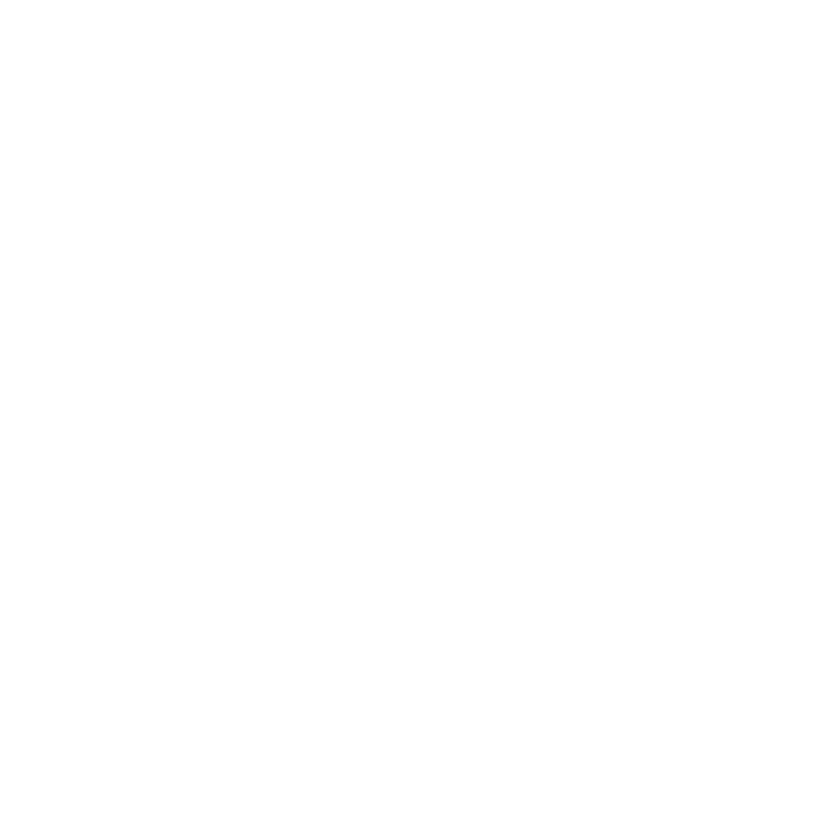

In [24]:
# factor (handle the qualitative (categorical) variable)
gradetxt <- read.table("example/0201.grade.txt",
                       header=FALSE,
                       sep = "\t",
                       stringsAsFactor = FALSE,
                       na.strings = ""
                      )

# without handling factor
print(gradetxt)
plot(x = gradetxt$V2, y = gradetxt$V4) # Error in plot

 Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...



  Male Female 
    25     25 

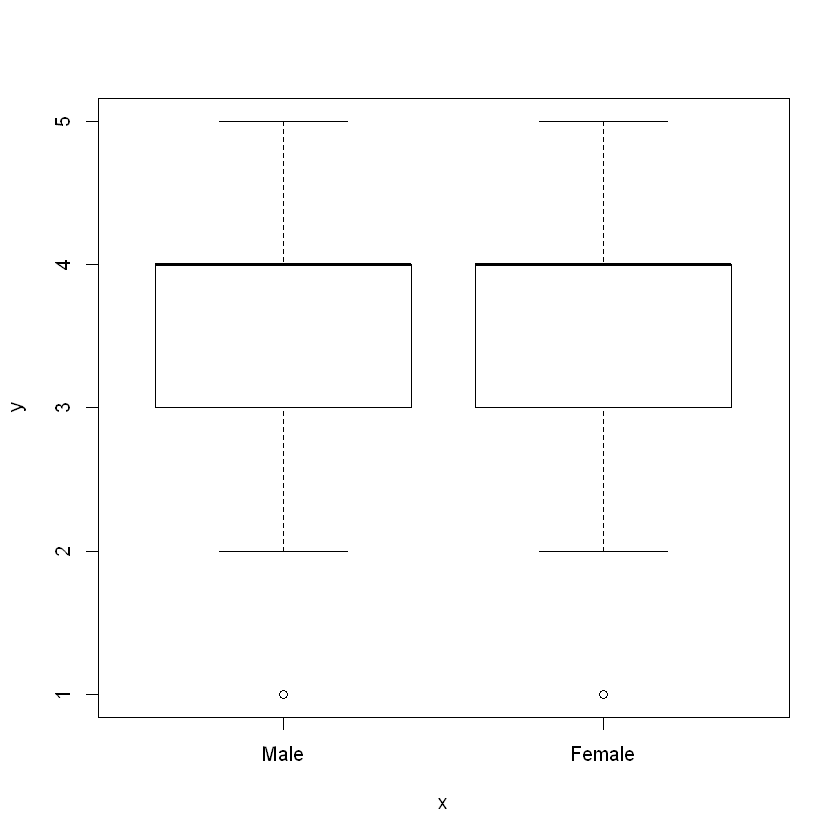

In [25]:
# Character type data factor
# with handling factor
gradetxt$V2 <- factor(gradetxt$V2,
                      levels = c("Male", "Female")
                     )
str(gradetxt$V2)
table(gradetxt$V2)
plot(x = gradetxt$V2, y = gradetxt$V4)

In [26]:
# Numeric variable factor
gradetxt$V3 <- factor(gradetxt$V3,
                      levels = c(1,2)
                     )
str(gradetxt$V3)
table(gradetxt$V3)

 Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...



 1  2 
25 25 

In [27]:
gradetxt$V3 <- factor(gradetxt$V3,
                      levels = c(1,2),
                      labels = c("M","F")
                     )
str(gradetxt$V3)
table(gradetxt$V3)

 Factor w/ 2 levels "M","F": 1 1 1 1 1 1 1 1 1 1 ...



 M  F 
25 25 

[Back to the top](#Table_of_Contents)

<h3>Export_the_data</h3>

<h4>Export_the_txt_file</h4>

In [28]:
# Export the data (write.txt)
str(gradetxt)

write.table(gradetxt,
            file = "example/output/gradetxt.txt",
            row.names = FALSE,
            na = "",
            col.names = FALSE,
            sep = ","
           )

'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...
 $ V3: Factor w/ 2 levels "M","F": 1 1 1 1 1 1 1 1 1 1 ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...


In [29]:
# Reload the data (read.table)
gradetxt1 <- read.table("example/output/gradetxt.txt",
                        header = FALSE,
                        sep = ",",
                        stringsAsFactor = FALSE,
                        na.strings = ""
                       )
# V3 converts from number to character type and saves
str(gradetxt)
str(gradetxt1)

'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...
 $ V3: Factor w/ 2 levels "M","F": 1 1 1 1 1 1 1 1 1 1 ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...
'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: chr  "Male" "Male" "Male" "Male" ...
 $ V3: chr  "M" "M" "M" "M" ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...


[Back to the top](#Table_of_Contents)

<h4>Export_the_csv_file</h4>

In [34]:
# Export the data (write.csv)
write.csv(gradecsv,
          file = "example/output/gradecsv.csv",
          row.names=FALSE,
          na=""
         )

[Back to the top](#Table_of_Contents)

<h4>Export_the_excel_file</h4>

In [37]:
# Export the data (write_xlsx)
str(gradexls)

Classes 'tbl_df', 'tbl' and 'data.frame':	50 obs. of  4 variables:
 $ id   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : chr  "Male" "Male" "Male" "Male" ...
 $ csex : num  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: num  3 4 5 3 2 5 4 4 3 2 ...


In [38]:
install.packages("writexl")
library(writexl)
write_xlsx(gradexls,
           path = "example/output/gradexls.xlsx"
          )

package 'writexl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpeUstLR\downloaded_packages


Warning message:
"package 'writexl' was built under R version 3.6.3"

[Back to the top](#Table_of_Contents)

<h4>Export_the_data_as_R</h4>

In [39]:
# Export the data as R data
save(gradetxt, file="example/output/grade.RData")

In [40]:
load(file="example/output/grade.RData")

[Back to the top](#Table_of_Contents)

<h3>Manipulate_the_data</h3>

Two libraries, tidyr and dplyr libraries provide really great functions for manipulating data frames. A couple of quick examples are in the following. Typically I use it to convert between wide and long data formats.

In [9]:
# install.packages("dplyr")
# install.packages("tidyr")
# install.packages("Lahman")
library(dplyr)
library(tidyr)
library(Lahman)  #I'm using a data set from this library

also installing the dependencies 'ellipsis', 'glue', 'lifecycle', 'rlang', 'tibble', 'tidyselect', 'vctrs', 'pillar'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
tibble  3.1.1  3.1.2              TRUE
pillar  1.6.0  1.6.1             FALSE

  Binaries will be installed


Warning message:
"package 'dplyr' is in use and will not be installed"

package 'ellipsis' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'lifecycle' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"Warning message:
"restored 'tibble'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"Warning message:
"restored 'tidyselect'"

package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpQDn5MV\downloaded_packages


installing the source package 'pillar'

Warning message in install.packages("dplyr"):
"installation of package 'pillar' had non-zero exit status"also installing the dependencies 'glue', 'rlang', 'tibble', 'pillar', 'dplyr', 'tidyselect', 'cpp11'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
tibble  3.1.1  3.1.2              TRUE
pillar  1.6.0  1.6.1             FALSE

  Binaries will be installed


Warning message:
"packages 'dplyr', 'tidyr' are in use and will not be installed"

package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"Warning message:
"restored 'tibble'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kimji\.conda\envs\slap\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\Users\kimji\.conda\envs\slap\Lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"Warning message:
"restored 'tidyselect'"

package 'cpp11' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpQDn5MV\downloaded_packages


installing the source package 'pillar'

Warning message in install.packages("tidyr"):
"installation of package 'pillar' had non-zero exit status"

package 'Lahman' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpQDn5MV\downloaded_packages


Warning message:
"package 'Lahman' was built under R version 3.6.3"

In [10]:
# Use this Batting data (this is in the Lahman library)
dim(Batting)
names(Batting)

players = group_by(Batting, playerID)
#players looks the same, but has more info, as the grouping has been defined
dim(players)
dim(Batting)
head(players)
head(Batting)
# Now I can create easy summaries, over players...
games = summarise(players, total = sum(G))

# dplyr adds the %>% function, which serves as a "pipe", piping the output from one
#  command into the input of the next.  Really cleans up code.  This does what the above code did
games.using.dplyr = Batting %>%
  group_by(playerID) %>%
  summarise(total = sum(G))

[1] 108789     22

[1] "playerID" "yearID"   "stint"    "teamID"   "lgID"     "G"       
 [7] "AB"       "R"        "H"        "X2B"      "X3B"      "HR"      
[13] "RBI"      "SB"       "CS"       "BB"       "SO"       "IBB"     
[19] "HBP"      "SH"       "SF"       "GIDP"

[1] 108789     22

[1] 108789     22

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
abercda01,1871,1,TRO,NA,1,4,0,0,0,...,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,...,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,...,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,...,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,...,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,...,5,0,1,0,1,NA,NA,NA,NA,0


playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
abercda01,1871,1,TRO,NA,1,4,0,0,0,...,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,...,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,...,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,...,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,...,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,...,5,0,1,0,1,NA,NA,NA,NA,0


[Back to the top](#Table_of_Contents)

<h2>References</h2>

Intoduction of the data structure in R, please refer to the link below: <br>
[Ch02_01.R 데이터 처리(데이터구조)01](https://youtu.be/DJZGU6DieNs) <br>
[Ch02_02.R 데이터 처리(벡터)02](https://youtu.be/PsizlmG1ZQ0) <br>
[Ch02_03.R 데이터 처리(행렬과 벡터)03](https://youtu.be/OuT9jIr2Or4) <br>
[Ch02_04.R 데이터 처리(데이터프레임과 리스트)04](https://youtu.be/bvvKJpTlP-s) <br>
[R 데이터 구조 (Data Structure in R) : scala, vector, factor, matrix, array, dataframe, list](https://rfriend.tistory.com/14?category=601862)
[Matrices, lists, arrays and data frames](https://jeanettemumford.org/R-tutorial/01-getting-started/)

Intoduction of the data input and output in R, please refer to the link below: <br>
[Ch02_05.R 데이터 처리(txt데이터가져오기)05](https://youtu.be/NXxfNWYUxyg) <br>
[Ch02_06.R 데이터 처리(csv데이터가져오기)06](https://youtu.be/RH82mghumAg) <br>
[Ch02_07.R 데이터 처리(excel데이터가져오기)07](https://youtu.be/WAsnbhQOiQ4) <br>
[Ch03_01.R 기술통계분석(범주형)(작업환경설정)01](https://youtu.be/fXjy0w-QEgA) <br>
[Ch03_02.R 기술통계분석(범주형)(데이터 내보내기 1/2)02](https://youtu.be/8a-0cw07Iao) <br>
[Ch03_03.R 기술통계분석(범주형)(데이터 내보내기 2/2)03](https://youtu.be/sZt1rfiyHS8) <br>
[Reading in data](https://jeanettemumford.org/R-tutorial/09-reading-in-data/) <br>
[Extra bits we probably won't have time to cover](https://jeanettemumford.org/R-tutorial/10-extras-dplyr-tidyr-fmri/)